How to Extract Text from Images in Python using OpenCV and EasyOCR

https://www.youtube.com/watch?v=9_SRXdO9EC4

### Step 1: Install and Import Modules

In [1]:
#!pip install opencv-python
#!pip install matplotlib
#!pip install numpy

In [2]:
#!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117 # for easyocr to use
#!pip install easyocr  

In [3]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline

### Step 2: Image loading and text recognition using EasyOCR

In [4]:
pthImages = r'C:\Users\hilton.netta\OneDrive - Prescient\py\gitrepo\Images'

In [5]:
im01_pth = pthImages + r'\Untitled01.jpg'
im02_pth = pthImages + r'\Untitled02.jpg'
im03_pth = pthImages + r'\Untitled03.jpg'
im04_pth = pthImages + r'\Untitled04.jpg'
im05_pth = pthImages + r'\Untitled05.jpg'
im06_pth = pthImages + r'\Untitled06.jpg'
im07_pth = pthImages + r'\Untitled07.jpg'
im08_pth = pthImages + r'\Untitled08.jpg'
im09_pth = pthImages + r'\Untitled09.jpg'
im10_pth = pthImages + r'\Untitled10.jpg'
im11_pth = pthImages + r'\Untitled11.jpg'
im12_pth = pthImages + r'\Untitled12.jpg'
im13_pth = pthImages + r'\Untitled13.jpg'
im14_pth = pthImages + r'\Untitled14.jpg'
im15_pth = pthImages + r'\Untitled15.jpg'
im16_pth = pthImages + r'\Untitled16.jpg'
im17_pth = pthImages + r'\Untitled17.jpg'
im18_pth = pthImages + r'\Untitled18.jpg'
im19_pth = pthImages + r'\Untitled19.jpg'
im20_pth = pthImages + r'\images20.jpg'
im21_pth = pthImages + r'\images21.jpg'
im22_pth = pthImages + r'\images22.jpg'
im23_pth = pthImages + r'\images23.jpg'
im24_pth = pthImages + r'\images24.jpg'

In [6]:
def recognise_text(img_path): # loads an image and recognises its text
    reader = easyocr.Reader(['en'])
    return reader.readtext(img_path)

In [7]:
result24 = recognise_text(im24_pth)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [8]:
result24

[([[670, 526], [738, 526], [738, 552], [670, 552]], '40C', 0.3784234713988519),
 ([[857, 538], [1099, 538], [1099, 575], [857, 575]],
  'So"ThAFRICA',
  0.14457355210004005),
 ([[652, 552], [755, 552], [755, 601], [652, 601]], 'ZA', 0.9798126917111712),
 ([[120, 605], [378, 605], [378, 634], [120, 634]],
  'CARTADEC QUCAO',
  0.2367646547376105),
 ([[397, 587], [435, 587], [435, 623], [397, 623]], '', 0.0),
 ([[117, 643], [261, 643], [261, 679], [117, 679]],
  'HSinA',
  0.15244202187502542),
 ([[118, 694], [196, 694], [196, 722], [118, 722]],
  'IoNas',
  0.025691556059059078),
 ([[230, 690], [563, 690], [563, 730], [230, 730]],
  '0246810785217086',
  0.6213718031842274),
 ([[642, 696], [712, 696], [712, 726], [642, 726]],
  'KLE',
  0.033405087428410814),
 ([[116, 730], [179, 730], [179, 760], [116, 760]],
  'Binth',
  0.2585263525516084),
 ([[404, 727], [727, 727], [727, 764], [404, 764]],
  '402 Arttncuan',
  0.023707495325167815),
 ([[116, 766], [187, 766], [187, 798], [116, 798]

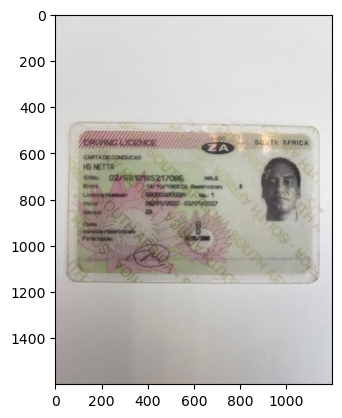

In [9]:
im24 = cv2.imread(im24_pth)
im24 = cv2.cvtColor(im24, cv2.COLOR_BGR2RGB)
plt.imshow(im24)

### Step 3: Overlay recognised text on image using OpenCV

In [10]:
def overlay_ocr_text(img_path, save_name): # loads an image, reciognises text, and overlays the text on the image
    
    #load the image
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    
    dpi = 90
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1, 2, figsize = (fig_width, fig_height)) # 1 row and 2 columns
    axarr[0].imshow(img)                                             # original image will be shown at left
    
    # recognise text
    result = recognise_text(img_path)
    
    # if OCR probability is over .5, overlay the bounding box and index
    for (bbox, text, prob) in result:
        if prob >= .5:
            # display
            print(f'Detected text: {text} (Probability: {prob: .2f})')
            
            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left     = (int(top_left[0]),     int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))
            
            # create a rectangle for bbox display
            cv2.rectangle(img = img, pt1 = top_left, pt2 = bottom_right, color = (255, 0, 0), thickness = 10)
            
            # insert recognised text
            cv2.putText(img = img, text = text, org = (top_left[0], top_left[1] - 10),
                        fontFace = cv2.FONT_HERSHEY_SIMPLEX, fontScale = 1, color = (255, 0, 0), thickness = 8)
            
    # show and save image
    axarr[1].imshow(img)
    plt.savefig(pthImages + fr'/{save_name}_overlay.jpg', bbox_inches = 'tight')

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected text: ZA (Probability:  0.98)
Detected text: 0246810785217086 (Probability:  0.62)
Detected text: Valld (Probability:  0.89)
Detected text: ~ (Probability:  0.50)
Detected text: E (Probability:  0.72)
Detected text: 8 (Probability:  1.00)
Detected text: 3 (Probability:  0.93)
Detected text: 8 (Probability:  0.50)


<Figure size 640x480 with 0 Axes>

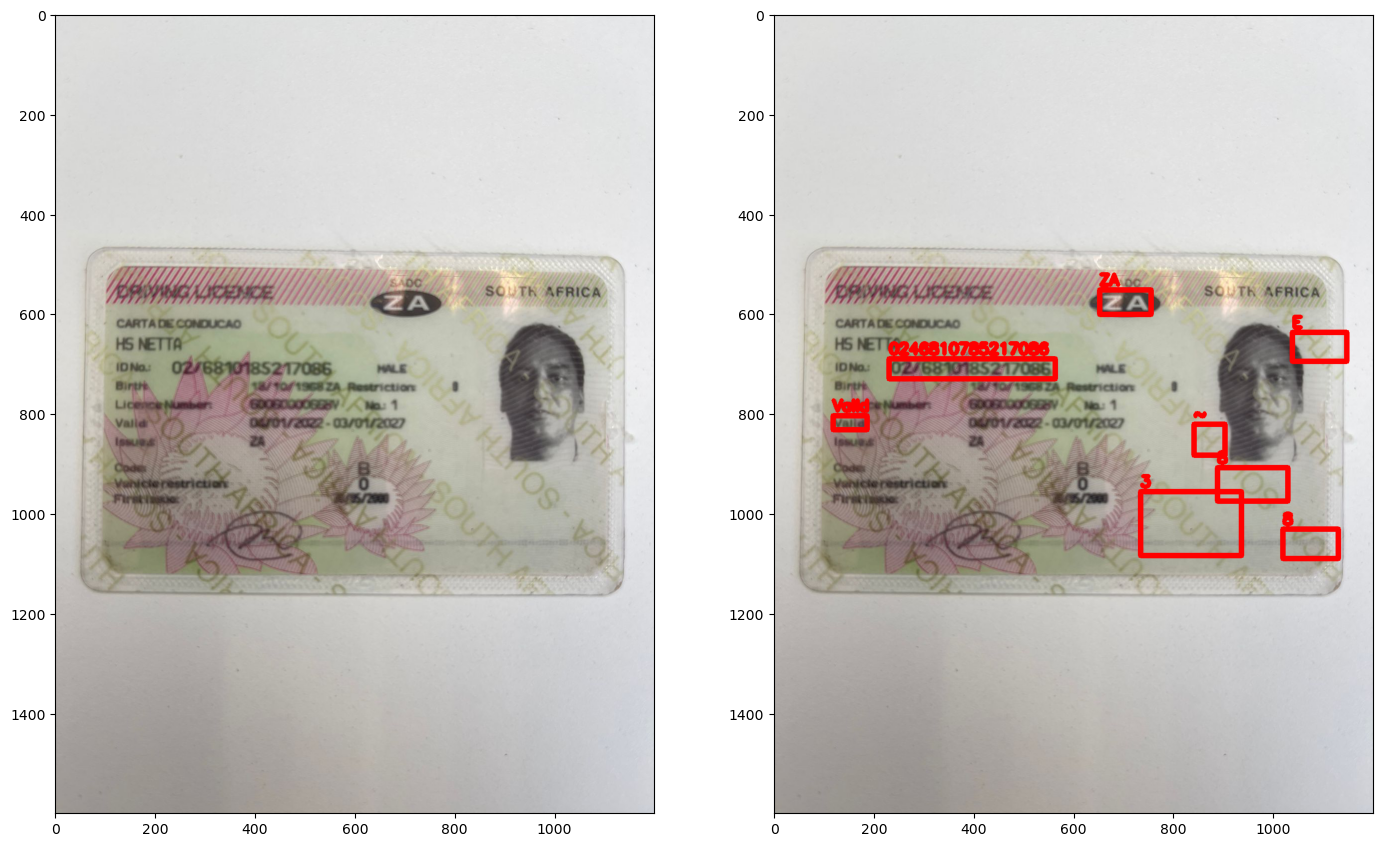

In [11]:
overlay_ocr_text(im24_pth, 'drivers_licence')

### Bonus: Text-to-speech recognition

In [13]:
result   = recognise_text(im24_pth)
sentence =''
for (bbox, text, prob) in result:
    sentence += f'{text}'
    
print(sentence)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


40CSo"ThAFRICAZACARTADEC QUCAOHSinAIoNas0246810785217086KLEBinth402 ArttncuanLicrBanoAta 1Valld04020u1r2UedDa~ucetencuen0EneaL2E`983APS8


In [12]:
#!pip install pyttsx3

In [14]:
import pyttsx3 # text-to-speeh module

engine = pyttsx3.init()
engine.setProperty('rate', 100)
engine.say(sentence)
engine.runAndWait()